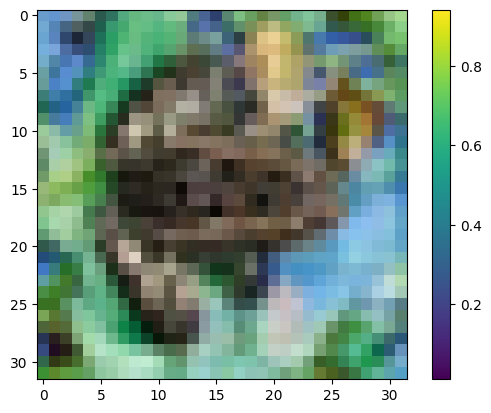

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
%matplotlib inline
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Input, Conv2D, Dense, Flatten, Dropout
from tensorflow.keras import utils


(x_train, y_train), (x_test, y_test) = cifar10.load_data()

class_names = ('airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship')


x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train = x_train / 255.0
x_test = x_test / 255.0

plt.figure()
plt.imshow(x_train[200])
plt.colorbar()
plt.grid(False)

In [3]:
y_train_cat = keras.utils.to_categorical(y_train, 10)
y_test_cat = keras.utils.to_categorical(y_test, 10)

In [4]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(32, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))
model.add(keras.layers.Conv2D(128, (3, 3), padding='same', activation='relu', input_shape=(32, 32, 3)))
model.add(keras.layers.MaxPooling2D((2, 2)))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(128, activation='relu'))
model.add(keras.layers.Dense(10, activation='softmax'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 32, 32, 32)        896       
                                                                 
 conv2d_1 (Conv2D)           (None, 32, 32, 64)        18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 16, 16, 64)       0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 16, 16, 64)        36928     
                                                                 
 conv2d_3 (Conv2D)           (None, 16, 16, 128)       73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 8, 8, 128)        0         
 2D)                                                    

In [5]:
model.compile(
              optimizer='Nadam',
              loss='mean_squared_error',
              metrics=['accuracy'])

In [6]:
model.fit(x_train, y_train_cat, batch_size=64, epochs=10, validation_split=0.2)
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print('Test loss:', test_loss)
print('Test accuracy:', test_acc)

Epoch 1/10
625/625 [==============================] - 431s 686ms/step - loss: 0.0693 - accuracy: 0.4268 - val_loss: 0.0545 - val_accuracy: 0.5861
Epoch 2/10
625/625 [==============================] - 416s 666ms/step - loss: 0.0480 - accuracy: 0.6410 - val_loss: 0.0425 - val_accuracy: 0.6839
Epoch 3/10
625/625 [==============================] - 424s 678ms/step - loss: 0.0389 - accuracy: 0.7157 - val_loss: 0.0385 - val_accuracy: 0.7224
Epoch 4/10
625/625 [==============================] - 403s 645ms/step - loss: 0.0333 - accuracy: 0.7621 - val_loss: 0.0360 - val_accuracy: 0.7396
Epoch 5/10
625/625 [==============================] - 422s 676ms/step - loss: 0.0291 - accuracy: 0.7951 - val_loss: 0.0357 - val_accuracy: 0.7396
Epoch 6/10
625/625 [==============================] - 422s 676ms/step - loss: 0.0255 - accuracy: 0.8225 - val_loss: 0.0356 - val_accuracy: 0.7436
Epoch 7/10
625/625 [==============================] - 398s 637ms/step - loss: 0.0222 - accuracy: 0.8469 - val_loss: 0.0325 -

In [7]:
predictions = model.predict(x_train)

1563/1563 [==============================] - 127s 81ms/step


Text(0.5, 0, '[6]')

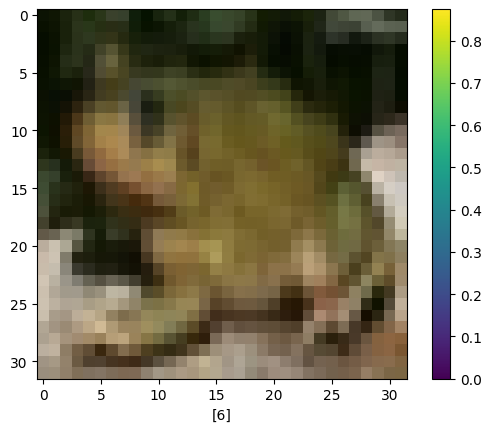

In [9]:
predictions[333]

np.argmax(predictions[333])
y_test[333]

plt.figure()
plt.imshow(x_test[333])
plt.colorbar()
plt.grid(False)

plt.xlabel(y_test[333])